
I will be analysing how the company spend its money in advertisement to increase sales. I will testing two machine learning 

models and verifie the best one, predicting the sales based on the amount the company spend for each platform.

Step1:: Getting the data

Step2: Data Anaysis and cleaning

Step3: Exploratory Data analysis

Step4: Modeling the data, testing

Step5: Result



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("advertising.csv",index_col = 'Unnamed: 0')
display(df)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [80]:
#checking the duplicates
df.duplicated().any()

False

In [81]:
#checking null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [82]:
#Easier way for checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [83]:
#Basic statistical report

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the report, each columns has the length of 200. so there is no missing values. And all the columns almost follows a normal distribution.

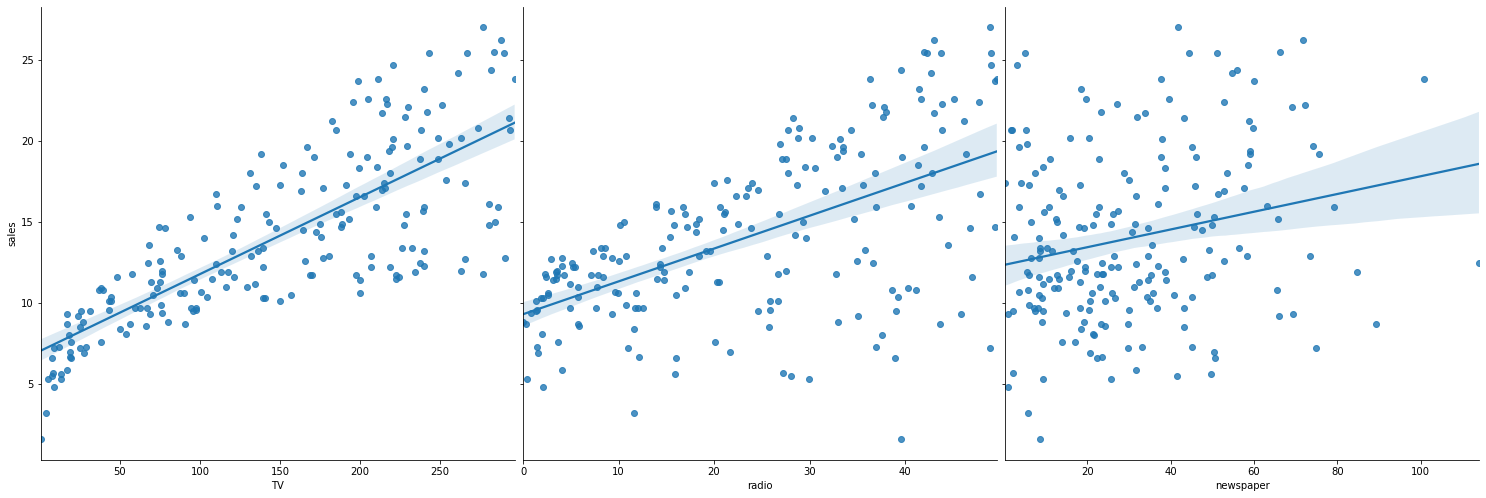

In [84]:
import seaborn as sns
sns.pairplot(df, x_vars = ['TV','radio','newspaper'], y_vars='sales',height=7, kind='reg')

From above,  TV is highly positively correlated. Newspaper is weakly correlated with sales. So, to predict the sales, TV and radio will be the most important.

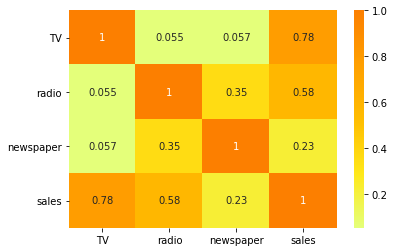

In [85]:
sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()

In [86]:
# Now I need to test the model base on the parameters and past results

from sklearn.model_selection import train_test_split

y = df["sales"]
x = df.drop("sales", axis=1)

# Separating test and train using the function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

Using the two models below

- Linear Regression
- RandomForest 

In [87]:
# Getting the moldes from libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Creating the models

linearregression_model = LinearRegression()
randomforest_model = RandomForestRegressor()

# Training the models

linearregression_model.fit(x_train, y_train)
randomforest_model.fit(x_train, y_train)

RandomForestRegressor()

In [88]:
#Evaluating the best model

from sklearn import metrics

# Forecast
forecast_linearregression = linearregression_model.predict(x_test)
forecast_randomforest = randomforest_model.predict(x_test)

# Comparing the models
print(metrics.r2_score(y_test,forecast_linearregression))
print(metrics.r2_score(y_test,forecast_randomforest))

0.9224605706201434
0.9842568141916839


 Based on the models above, the random forest show the hights rate with 98%

In [89]:
# Lets create a new table with radio, newspaper and tv values


display(forecast_randomforest)
# the table shows that for each row it generates this amount of sale.

array([23.251, 15.883,  9.689, 14.333, 15.769, 24.88 , 17.134, 13.771,
       11.133, 16.188, 14.819, 11.059, 16.646, 15.759, 12.869, 15.395,
       13.242, 12.419,  7.954, 18.349, 10.361, 12.687,  7.689, 12.166,
       12.596, 14.987, 10.289, 19.395, 18.86 , 15.617, 22.855, 12.152,
       16.848, 12.308, 20.291, 15.213, 11.863, 11.101, 22.254,  6.948,
        5.783,  9.578,  6.78 , 18.662,  6.108, 14.493, 13.804, 21.717,
       21.981, 20.205, 25.031, 14.512,  6.786, 20.729, 15.639, 13.267,
       12.116,  7.15 , 13.051, 10.236])

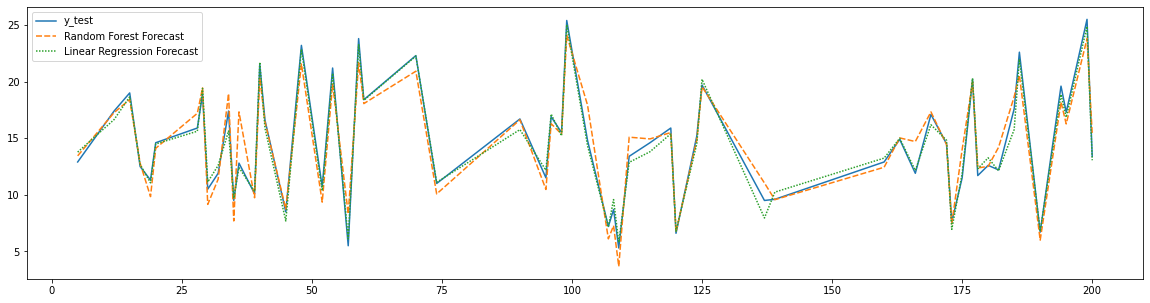

In [90]:
df_2 = pd.DataFrame()
df_2["y_test"] = y_test
df_2["Random Forest Forecast"] = forecast_linearregression
df_2["Linear Regression Forecast"] = forecast_randomforest


# Ploting the forecast by models
plt.figure(figsize=(20,5))
sns.lineplot(data=df_2)
plt.show()

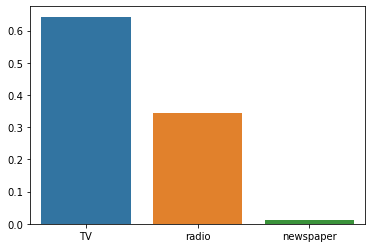

In [91]:
sns.barplot(x=x_train.columns, y=randomforest_model.feature_importances_)
plt.show()

# Based on the chart below, TV represent more than 60% of sales